# Notebook for EDA

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading dataset
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,year,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,2018,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,2018,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,2018,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [3]:
df.shape

(24496, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                24496 non-null  object 
 1   company                  24496 non-null  object 
 2   level                    24496 non-null  object 
 3   title                    24496 non-null  object 
 4   totalyearlycompensation  24496 non-null  float64
 5   location                 24496 non-null  object 
 6   yearsofexperience        24496 non-null  float64
 7   yearsatcompany           24496 non-null  float64
 8   tag                      24496 non-null  object 
 9   year                     24496 non-null  int64  
 10  month                    24496 non-null  int64  
 11  year_month               24496 non-null  object 
 12  timestamp_3mos           24496 non-null  object 
 13  year_month_3mos          24496 non-null  object 
 14  state_short           

In [5]:
df[['company','level','title','state','location']].apply(lambda x: len(x.unique()))

company     1284
level       1603
title         15
state         47
location     447
dtype: int64

In [6]:
df['company'].value_counts(normalize=True)

Amazon              0.115162
Microsoft           0.106915
Google              0.081891
Facebook            0.056172
Apple               0.044415
                      ...   
idemia              0.000041
Volkswagen          0.000041
MasterCard          0.000041
On Semiconductor    0.000041
Citibank            0.000041
Name: company, Length: 1284, dtype: float64

In [7]:
df['title'].value_counts()

Software Engineer               16677
Product Manager                  1832
Software Engineering Manager     1404
Data Scientist                    996
Hardware Engineer                 909
Product Designer                  622
Technical Program Manager         411
Solution Architect                401
Management Consultant             294
Business Analyst                  230
Marketing                         210
Recruiter                         141
Sales                             141
Mechanical Engineer               137
Human Resources                    91
Name: title, dtype: int64

In [8]:
df['level'].value_counts(normalize=True)

L4                          0.073236
L5                          0.064296
L3                          0.046212
L6                          0.035965
Senior Software Engineer    0.023677
                              ...   
Staff Consultant            0.000041
Lead Experience Designer    0.000041
m2                          0.000041
Senior Level 8              0.000041
Lead Associated             0.000041
Name: level, Length: 1603, dtype: float64

In [9]:
df['state'].value_counts(normalize=True)

California              0.460851
Washington              0.250367
New York                0.081279
Texas                   0.042089
Massachusetts           0.032169
Illinois                0.014247
Virginia                0.013472
Oregon                  0.010696
Colorado                0.010410
District of Columbia    0.010247
New Jersey              0.008165
Pennsylvania            0.008001
Georgia                 0.007552
North Carolina          0.006981
Arizona                 0.006246
Minnesota               0.004654
Florida                 0.004491
Utah                    0.004041
Wisconsin               0.003470
Michigan                0.002939
Missouri                0.002858
Ohio                    0.002327
Connecticut             0.001592
Arkansas                0.001510
Indiana                 0.001388
Maryland                0.001143
Tennessee               0.001061
Delaware                0.001021
Idaho                   0.000612
Iowa                    0.000572
Kansas    

**Observation**:

1. In the data, there are 1284 companies, 15 titles, and 47 states.
2. The top 5 companies are Amazon, Microsoft, Google, Facebook, and Apple.
3. The top 5 titles are Software Engineer, Product Manager, Software Engineering Manager, Data Scientist and Hardware Engineer.
4. The top states are California, Washington, New York, and Massachusetts.

# FIGURES

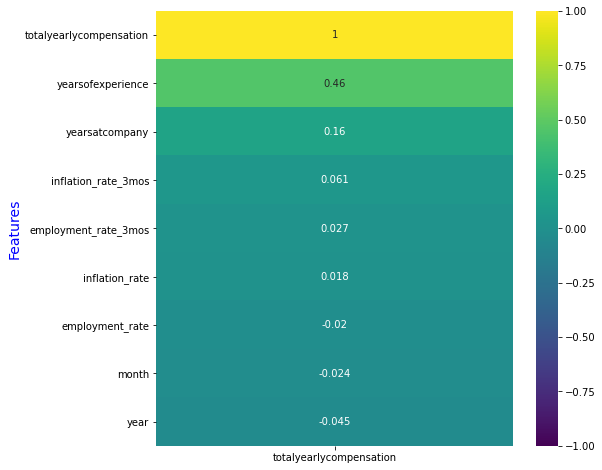

In [10]:
# Heatmap and Correlations 
figure = plt.figure(figsize=(8,8))
sns.heatmap(df.corr()[['totalyearlycompensation']].sort_values('totalyearlycompensation',ascending=False),annot=True, vmin = -1, vmax = 1, cmap='viridis', center=0)
plt.ylabel('Features', size=14, color='blue')
#plt.savefig('./images/AllFeature_SalePrice_Correlation.png')
plt.show();

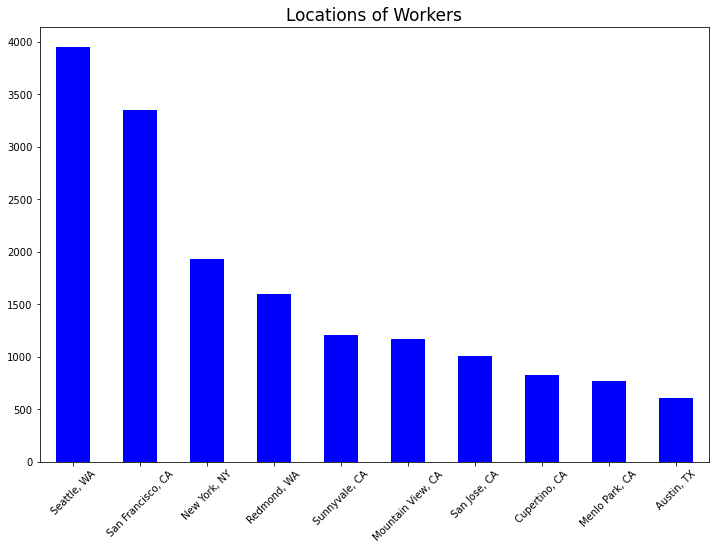

In [11]:
# EDA
plt.figure(figsize=(12,8))
df["location"].value_counts().iloc[:10].plot(kind="bar", color="blue")
plt.title("Locations of Workers", size=17)
plt.xticks(rotation=45)
plt.show()

## SEPARATE THIS PAIRPLOT

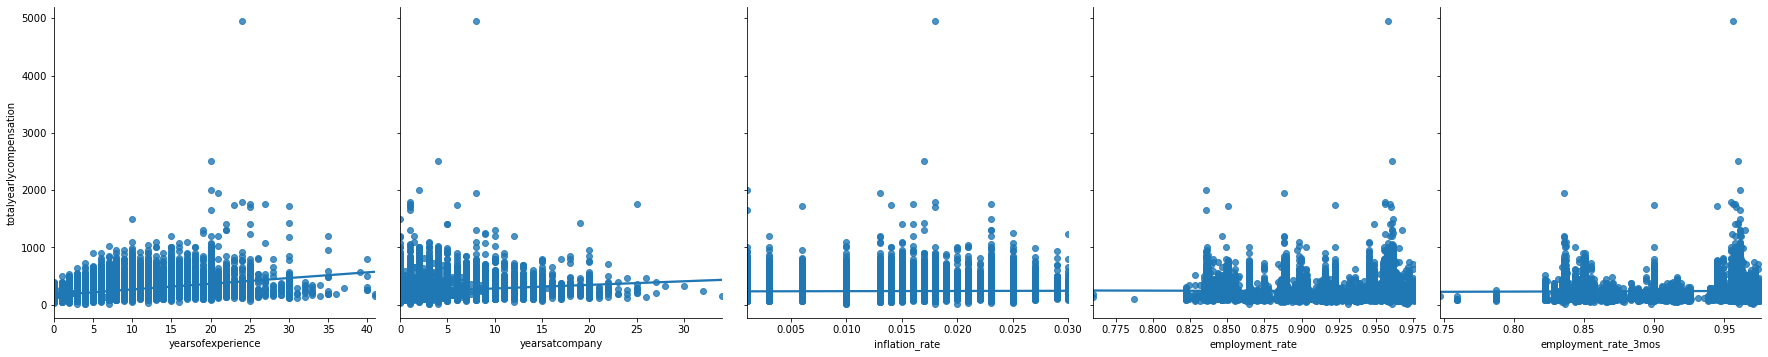

In [12]:
#Creating a pairplot with regression line for more visual aid
sns.pairplot(df, 
             x_vars=['yearsofexperience',
                            'yearsatcompany', 
                            'inflation_rate', 
                            'employment_rate', 
                            'employment_rate_3mos'],
             y_vars=['totalyearlycompensation'],
             kind='reg',
             height=5,
             aspect=1);

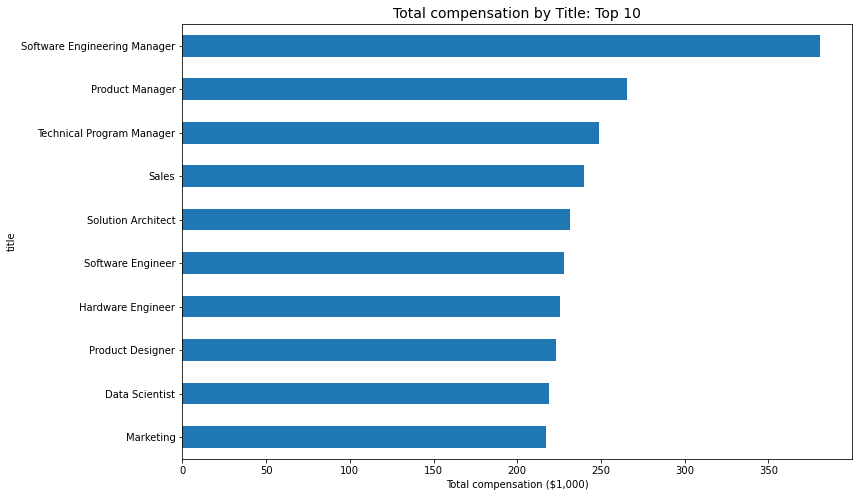

In [13]:
#df.groupby('title')['totalyearlycompensation'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
df.groupby(['title'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh')
plt.title('Total compensation by Title: Top 10', fontsize=14)
plt.xlabel('Total compensation ($1,000)')
plt.tight_layout;

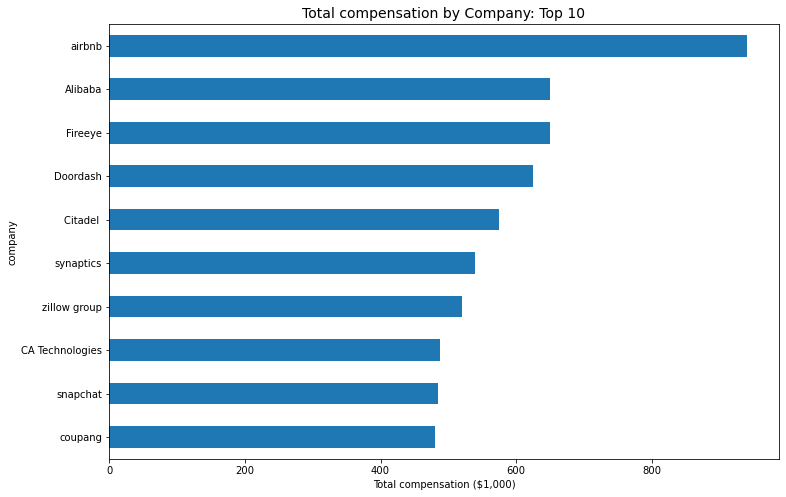

In [14]:
plt.figure(figsize=(12,8))
df.groupby(['company'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh')
plt.title('Total compensation by Company: Top 10', fontsize=14)
plt.xlabel('Total compensation ($1,000)')
plt.tight_layout;

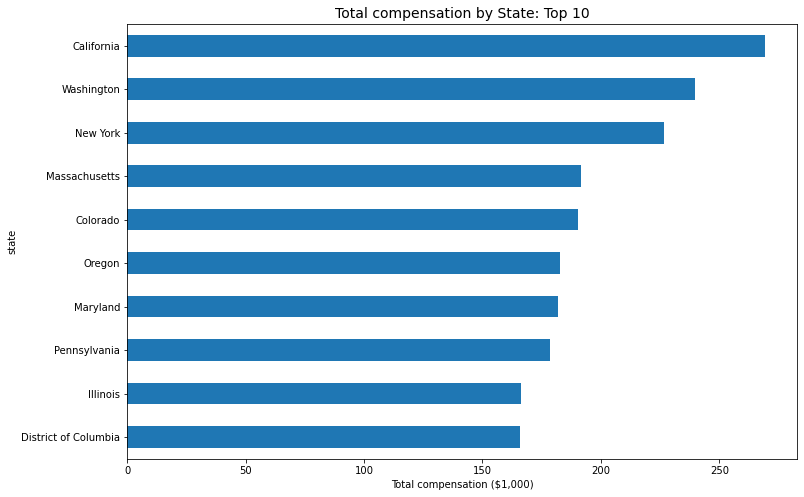

In [15]:
plt.figure(figsize=(12,8))
df.groupby(['state'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh')
plt.title('Total compensation by State: Top 10', fontsize=14)
plt.xlabel('Total compensation ($1,000)')
plt.tight_layout;

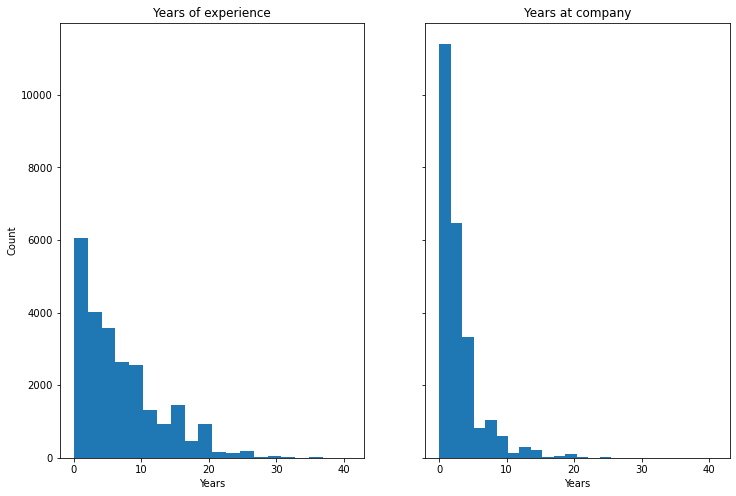

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharex=True, sharey=True)

ax1 = df['yearsofexperience'].plot(kind='hist', bins=20, ax=axes[0])
ax1.set_title('Years of experience')
ax1.set_ylabel('Count')
ax1.set_xlabel('Years')

ax2 = df['yearsatcompany'].plot(kind='hist', bins=20, ax=axes[1])
ax2.set_title('Years at company')
ax2.set_xlabel('Years');

**Observation**:

1. Total yearly compensation is mostly correlated with years of experience followed by years at the company.
2. Total yearly compensation seems more related to inflation and employment rates 3 months ago than the current months, though the corelations are all very small, probably not statistical significant.

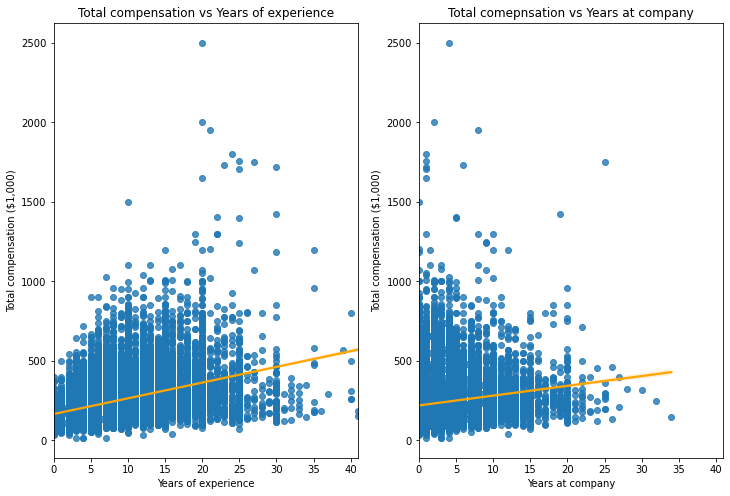

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharex=True)

ax1 = sns.regplot(data=df.loc[df['totalyearlycompensation'] < 4000, :], 
                  x='yearsofexperience', 
                  y='totalyearlycompensation', 
                  line_kws={'color':'orange'},
                  ax=axes[0])
ax1.set_title('Total compensation vs Years of experience')
ax1.set_xlabel('Years of experience')
ax1.set_ylabel('Total compensation ($1,000)')

ax2 = sns.regplot(data=df.loc[df['totalyearlycompensation'] < 4000, :], 
                  x='yearsatcompany', 
                  y='totalyearlycompensation', 
                  line_kws={'color':'orange'},
                  ax=axes[1])

ax2.set_title('Total comepnsation vs Years at company')
ax2.set_xlabel('Years at company')
ax2.set_ylabel('Total compensation ($1,000)')
plt.tight_layout;

## FIGURE OUT A WAY TO CONVERT TIMESTAMP TO MONTH/YEAR???

''

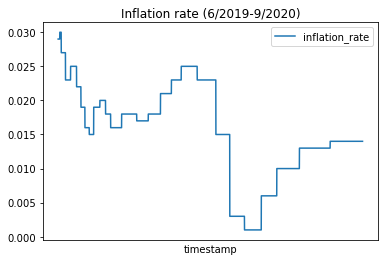

In [18]:
# inflaiton rate
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

#fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True)

ax1 = df.plot(x='timestamp', y='inflation_rate')
ax1.set_title('Inflation rate (6/2019-9/2020)')
#ax1.set_xticks(pd.to_datetime(df['timestamp']).dt.year)

ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
;

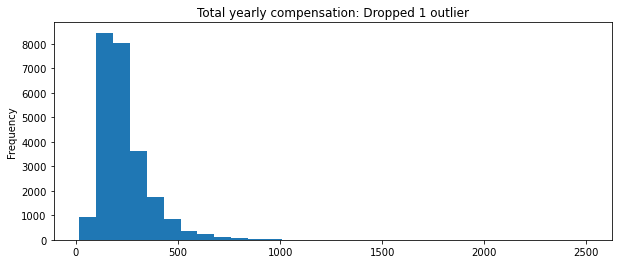

In [19]:

plt.figure(figsize=(10,4))
df.loc[df['totalyearlycompensation'] < 4000, 'totalyearlycompensation'].plot(kind='hist', bins=30)
plt.title('Total yearly compensation: Dropped 1 outlier')
plt.tight_layout;

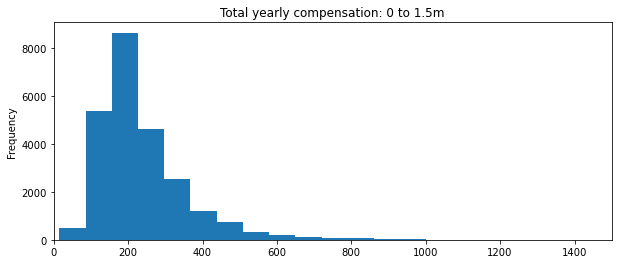

In [20]:
plt.figure(figsize=(10,4))
df['totalyearlycompensation'].plot(kind='hist', bins=70, xlim=(0,1500))
plt.title('Total yearly compensation: 0 to 1.5m')
plt.tight_layout;

In [21]:
for column in df:
    print(f'{column} : {sorted(list(df[column].unique()), reverse = True)[0:5]}')

timestamp : ['2020-09-30 23:16:19', '2020-09-30 23:04:34', '2020-09-30 22:54:25', '2020-09-30 22:30:24', '2020-09-30 22:08:32']
company : ['zynga', 'zoox', 'zillow group', 'yahoo', 'workday']
level : ['Сontractor', '||', 'x6', 'vice president', 'unknown']
title : ['Technical Program Manager', 'Solution Architect', 'Software Engineering Manager', 'Software Engineer', 'Sales']
totalyearlycompensation : [4950.0, 2500.0, 2000.0, 1950.0, 1800.0]
location : ['Yorktown Heights, NY', 'Woonsocket, RI', 'Woodland Hills, CA', 'Winston Salem, NC', 'Windsor, CT']
yearsofexperience : [41.0, 40.0, 39.0, 37.0, 36.0]
yearsatcompany : [34.0, 32.0, 30.0, 28.0, 27.0]
tag : ['Èda ', 'ux', 'user Experience ', 'unix/linux', 'undecided']
year : [2020, 2019, 2018]
month : [12, 11, 10, 9, 8]
year_month : ['2020-09', '2020-08', '2020-07', '2020-06', '2020-05']
timestamp_3mos : ['2020-06-30 23:16:19', '2020-06-30 23:04:34', '2020-06-30 22:54:25', '2020-06-30 22:30:24', '2020-06-30 22:08:32']
year_month_3mos : ['2

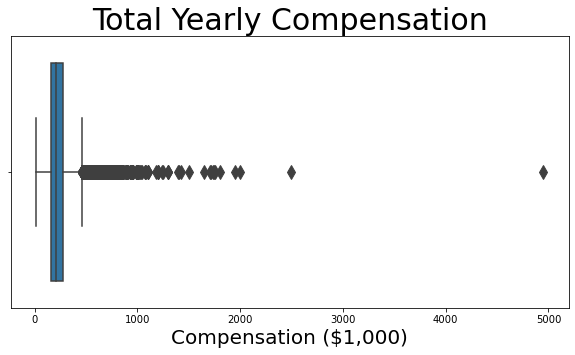

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['totalyearlycompensation'], fliersize = 10)
plt.title(label = 'Total Yearly Compensation', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Compensation ($1,000)', fontdict = {'size': 20}, loc = 'center');


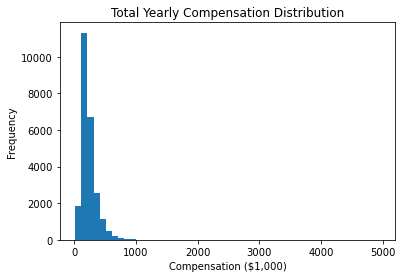

In [23]:
sp = (
    df['totalyearlycompensation']      
    .plot(
        kind='hist',
        title='Total Yearly Compensation Distribution',
        bins = 50
        )
)

sp.set(xlabel = 'Compensation ($1,000)');

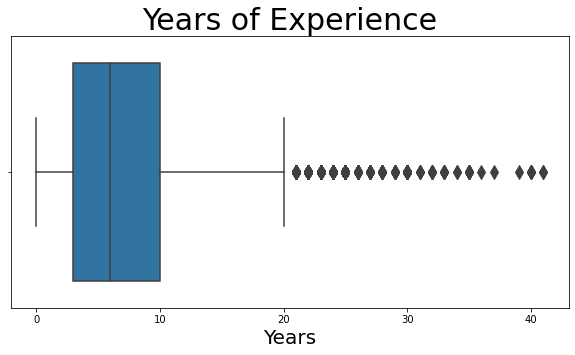

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['yearsofexperience'], fliersize = 10)
plt.title(label = 'Years of Experience', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center');

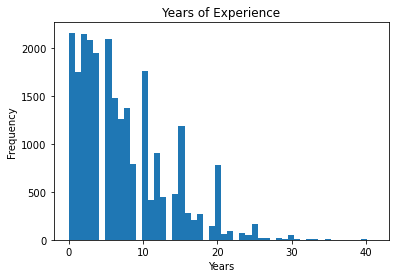

In [25]:
sp = (
    df['yearsofexperience']      
    .plot(
        kind='hist',
        title='Years of Experience',
        bins = 50
        )
)

sp.set(xlabel = 'Years');

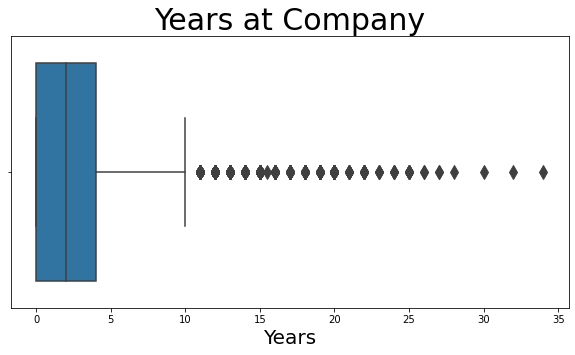

In [26]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['yearsatcompany'], fliersize = 10)
plt.title(label = 'Years at Company', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center');

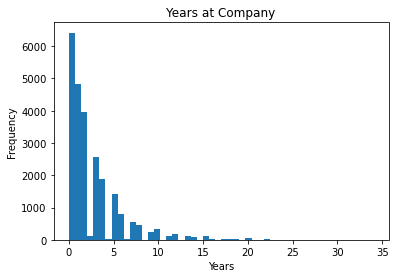

In [27]:
sp = (
    df['yearsatcompany']      
    .plot(
        kind='hist',
        title='Years at Company',
        bins = 50
        )
)

sp.set(xlabel = 'Years');

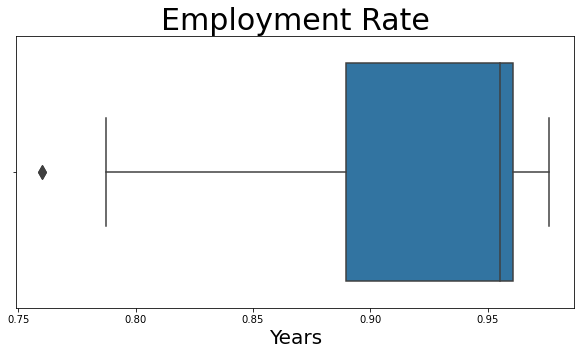

In [28]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['employment_rate'], fliersize = 10)
plt.title(label = 'Employment Rate', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center');

Comment: How can we improve this?

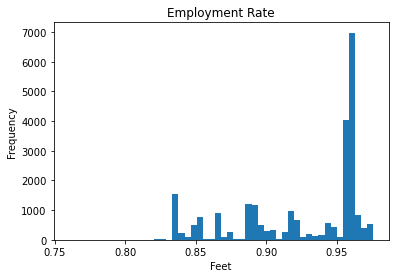

In [29]:
sp = (
    df['employment_rate']      
    .plot(
        kind='hist',
        title='Employment Rate',
        bins = 50
        )
)

sp.set(xlabel = 'Feet');

Comment: how can we improve this?

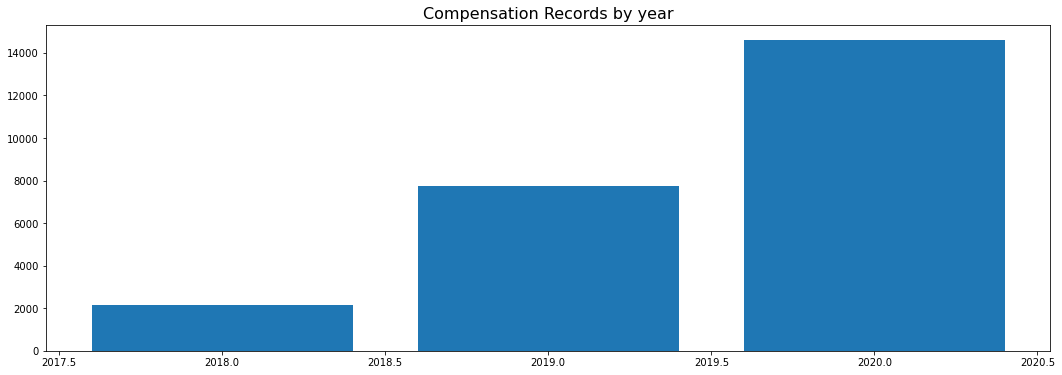

In [30]:
# Using the matplotlib bar function and methods

# Set the figure size
plt.figure(figsize=(18, 6))

# Make the plot
plt.bar(df['year'].value_counts().index,
        df['year'].value_counts())
plt.title('Compensation Records by year', fontsize=16)
plt.tight_layout;

In [31]:
df.groupby('title')['level'].unique()

title
Business Analyst                [L4, 62, L1, L5, T5, 10, L3, L6, Senior, Level...
Data Scientist                  [Senior, 64, Staff, T6, L5, 65, L6, II, Sr UX ...
Hardware Engineer               [ICT4, L2, icb6-master, ICT3, Senior Staff Eng...
Human Resources                 [Band 10, 63, 28, 22, IC5, L1, Manager, Analys...
Management Consultant           [Analyst, Manager, Business Technology Analyst...
Marketing                       [65, Director, Senior Manager, IC7, level 6, L...
Mechanical Engineer             [6, Senior, L2, V, Senior Engineer, G06, L6, G...
Product Designer                [64, Staff SWE, IC3, User experience designer,...
Product Manager                 [63, 7, Software Engineer 4, 6, L07, IC4, 68, ...
Recruiter                       [IC4, IC5, Support, Recruiter 2, L4, L6, L2, G...
Sales                           [Vice President, L6, 64, Sales Leader, Senior,...
Software Engineer               [IC2, E3, Senior MTS, L4, Master Software Engi...
Software E

In [32]:
for i in df.groupby('title')['level'].unique():
    print(len(i))

77
230
180
38
85
93
60
183
329
55
64
989
279
142
121


In [33]:
df.groupby('totalyearlycompensation')['level'].unique()

totalyearlycompensation
15.0      [Senior, l3, G13]
16.0                [Eng 3]
35.0        [Part Time SE1]
36.0               [fellow]
37.0               [Senior]
                ...        
1800.0                 [68]
1950.0                 [L8]
2000.0                [EVP]
2500.0                 [L8]
4950.0                 [80]
Name: level, Length: 714, dtype: object

In [34]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


Feature: company, title, (location), yearsofexperience, yearsatcompany, (year, month, year_month), state_short, inflation_rate, inflation_rate_3mos, employment_rate, employment_rate_3mos
 
Target: totalyearlycompensation

In [35]:
# features = ['company', 'title', 'yearsofexperience', 'yearsatcompany', 'state_short', 'inflation_rate', 'employment_rate', 'employment_rate_3mos']

# X = df[features]
# y = df['totalyearlycompensation']

In [36]:
features = [col for col in df._get_numeric_data().columns if col != 'totalyearlycompensation']
X = df[features]
y = df['totalyearlycompensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
print('Data size:'.center(20, '='))
print(X.shape)
display(X.head())

=====Data size:=====
(24496, 8)


,yearsofexperience,yearsatcompany,year,month,inflation_rate,inflation_rate_3mos,employment_rate,employment_rate_3mos
0,0.58,0.58,2018,6,0.029,0.024,0.957660,0.956797
1,1.00,1.00,2018,6,0.029,0.024,0.955998,0.954978
2,8.00,1.00,2018,6,0.029,0.024,0.957660,0.956797
3,3.00,0.00,2018,6,0.029,0.024,0.957660,0.956797
4,8.00,2.00,2018,6,0.029,0.024,0.959053,0.955962


In [38]:
X.columns

Index(['yearsofexperience', 'yearsatcompany', 'year', 'month',
       'inflation_rate', 'inflation_rate_3mos', 'employment_rate',
       'employment_rate_3mos'],
      dtype='object')

In [39]:
# instantiate the model

lr = LinearRegression()
lr.fit(X_train, y_train) # fit on training data ONLY

LinearRegression()

In [40]:
# Train/Test scores
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.23148558334866076, 0.2271061519244083)

In [41]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -2.319923450670395
Test r2 score:  0.2271061519244083
Train RMSE: 114.2335
Test RMSE: 116.6251


In [42]:
#  cross_val_score
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=5).mean()

0.23400698816378246

In [43]:
# Use the model in cross_val_score
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=7).mean()

0.23436582106360732

In [44]:
# Use the model in cross_val_score
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=6).mean()

0.23409167840478373

In [45]:
# Use the model in cross_val_score
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=4).mean()

0.23323377124259825

In [46]:
# Use the model in cross_val_score
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=3).mean()

0.23157986613348916

In [47]:
# Use the model in cross_val_score
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=2).mean()

0.23174832126349232

---

---



In [48]:
features = ['yearsofexperience', 'yearsatcompany','inflation_rate', 'inflation_rate_3mos', 'employment_rate',
       'employment_rate_3mos']
X = df[features]
y = df['totalyearlycompensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (19596, 6)
X_test: (4900, 6)
y_train: (19596,)
y_test: (4900,)


In [50]:
# Poly testing
poly = PolynomialFeatures(interaction_only=True,include_bias=False)

X_train_pf = poly.fit_transform(X_train)


X_test_pf = poly.transform(X_test)

In [51]:
# Standard Scaler

ss= StandardScaler()
X_train = ss.fit_transform(X_train_pf)
X_test = ss.transform(X_test_pf)

### 1. Linear Regression


In [52]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
lr.score(X_train,y_train), lr.score(X_test,y_test)


(0.24076433979342182, 0.2368922237826827)

In [54]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test),4)}.')

In [55]:
display_R2_scores(lr, X_train, y_train, X_test, y_test)

The mean cross validation score for this model is 0.2417.
The training score for this model is 0.2408.
The testing score for this model is 0.2369.


In [56]:
lr_preds = lr.predict(X_test)

In [57]:
feature_coeflst = [f'{X.columns[i]}: {lr.coef_[i]}' for i in range(0, len(X.columns))]

In [58]:
feature_coeflst

['yearsofexperience: 235.61448662938875',
 'yearsatcompany: -46.93989394288312',
 'inflation_rate: -247.45822306016348',
 'inflation_rate_3mos: -26.34150665681341',
 'employment_rate: 240.4213089583153',
 'employment_rate_3mos: 263.34237535469384']

In [59]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['features', 'coefficients']).sort_values(by='coefficients', ascending=False).head()

,features,coefficients
5,employment_rate_3mos,263.342375
4,employment_rate,240.421309
0,yearsofexperience,235.614487
3,inflation_rate_3mos,-26.341507
1,yearsatcompany,-46.939894


In [60]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['features', 'coefficients']).sort_values(by='coefficients', ascending=False).tail()

,features,coefficients
4,employment_rate,240.421309
0,yearsofexperience,235.614487
3,inflation_rate_3mos,-26.341507
1,yearsatcompany,-46.939894
2,inflation_rate,-247.458223


In [61]:
intercept = lr.intercept_
intercept

235.92768932424542

### 2. Lasso


In [62]:
# # import Lasso regression from sklearn library
# from sklearn.linear_model import Lasso
 
# # Train the model
# lasso = Lasso(alpha = 1)
# lasso.fit(X_train, y_train)
# y_pred1 = lasso.predict(X_test)
 
# # Calculate Mean Squared Error
# mean_squared_error = np.mean((y_pred1 - y_test)**2)
# print("Mean squared error on test set", mean_squared_error)
# lasso_coeff = pd.DataFrame()
# lasso_coeff["Columns"] = X_train.columns
# lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
# print(lasso_coeff)

# # Code from https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/

In [63]:
# Lasso

l_alphas = np.logspace(0,5,100)

lasso_cv = LassoCV(alphas=l_alphas, cv=5, n_jobs=-1)

lasso_cv.fit(X_train, y_train);

In [64]:
lasso_cv.alpha_

1.0

In [65]:
lasso_cv.score(X_train, y_train), lasso_cv.score(X_test, y_test)


(0.23226684727913338, 0.22851469660456225)

In [66]:
lasso_preds = lasso_cv.predict(X_test)

### 3. Ridge

In [67]:
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 1)
# ridgeR.fit(X_train, y_train)
# y_pred = ridgeR.predict(X_test)
 
# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
# print(f'Ridge MSE: {mean_squared_error_ridge}\n')
 
# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print('       Coeffiecients ', ridge_coefficient)

In [68]:
# Ridge

r_alphas = np.logspace(0,5,100)

ridge_cv = RidgeCV(alphas = r_alphas, scoring='r2', cv=5)

ridge_cv.fit(X_train, y_train);

In [69]:
ridge_cv.alpha_


1.0

In [70]:
ridge_cv.score(X_train, y_train) , ridge_cv.score(X_test, y_test)


(0.240202112322765, 0.23658274736696772)

In [71]:
ridge_preds = ridge_cv.predict(X_test)


### 3. Elastic Net


In [72]:
# # import model
# from sklearn.linear_model import ElasticNet
 
# # Train the model
# e_net = ElasticNet(alpha = 1)
# e_net.fit(X_train, y_train)
 
# # calculate the prediction and mean square error
# y_pred_elastic = e_net.predict(X_test)
# mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
# print("Mean Squared Error on test set", mean_squared_error)
 
# e_net_coeff = pd.DataFrame()
# e_net_coeff["Columns"] = X_train.columns
# e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
# e_net_coeff

In [73]:
# Elastic Net
e_alphas = np.logspace(0,5,100)

elastic_cv = ElasticNetCV(alphas = e_alphas, cv=5)

elastic_cv.fit(X_train, y_train);

In [74]:
elastic_cv.score(X_train, y_train), elastic_cv.score(X_test, y_test)


(0.221572972441195, 0.21676074752133578)

In [75]:
elastic_preds = elastic_cv.predict(X_test)


In [76]:
X_train.shape

(19596, 21)

In [77]:
y_train.shape

(19596,)

### RMSE


In [78]:
print('RMSE for Linear Regression: ', metrics.mean_squared_error(y_test,lr_preds,squared=False))
print('RMSE for LASSO Regression: ', metrics.mean_squared_error(y_test,lasso_preds,squared=False))
print('RMSE for Ridge Regression: ', metrics.mean_squared_error(y_test,ridge_preds,squared=False))
print('RMSE for Elastic Net: ', metrics.mean_squared_error(y_test,elastic_preds,squared=False))

RMSE for Linear Regression:  115.88439223802891
RMSE for LASSO Regression:  116.51875525462562
RMSE for Ridge Regression:  115.90788816620278
RMSE for Elastic Net:  117.40300957206507


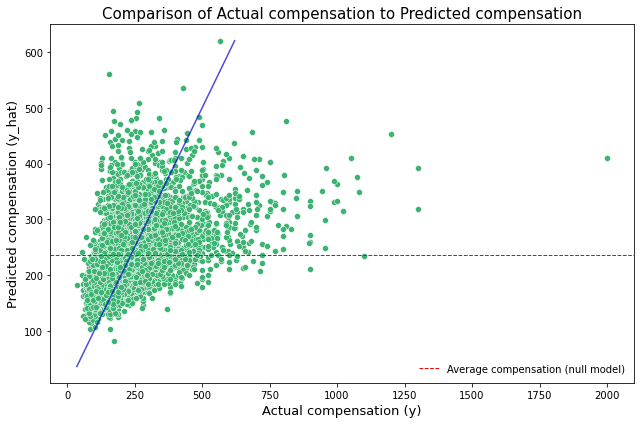

In [79]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = lr.predict(X_test), color = 'mediumseagreen')
plt.title('Comparison of Actual compensation to Predicted compensation', fontdict = {'fontsize':15})
maxDist = max(max(lr.predict(X_test)), max(lr.predict(X_test))) 
minDist = min(min(lr.predict(X_test)), min(y_test)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7) # Similar to Mahdi's code, but done with Seaborn
plt.xlabel('Actual compensation (y)', fontdict= {'fontsize':13})
plt.axhline(df['totalyearlycompensation'].mean(), linewidth=1, linestyle='dashed', color='r', label='Average compensation (null model)')
plt.ylabel('Predicted compensation (y_hat)', fontdict= {'fontsize':13})
plt.legend(frameon=False, loc='lower right')

plt.tight_layout();

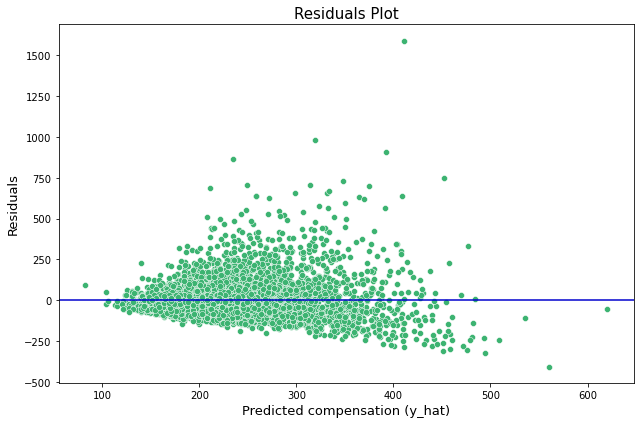

In [80]:
# Residuals Plot

resids = y_test - lr.predict(X_test)

plt.figure(figsize=(9,6))
sns.scatterplot(x = lr.predict(X_test), y = resids, color = 'mediumseagreen')
plt.axhline(0, color = 'mediumblue')
plt.title('Residuals Plot', fontdict = {'fontsize':15})
plt.xlabel('Predicted compensation (y_hat)', fontdict = {'fontsize':13})
plt.ylabel('Residuals', fontdict = {'fontsize':13})
#plt.savefig('./images/residueScatter.png')
plt.tight_layout();

## Final Score

|**Model**|**Training R^2 Score**|**Testing R^2 Score**|**RMSE**|
|--|--|--|--|
|**Linear Regression**||||
|**Lasso**||||
|**Ridge**||||
|**Elastic Net**||||


---

---



In [81]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [82]:
# ct = ColumnTransformer([
#     ('sc', StandardScaler(), make_column_selector(dtype_include=np.number)),
#     #('ohe', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
#     #('ohe', OneHotEncoder(handle_unknown='ignore'), ['company','title','year','month','state']),
#     ('ohe', OneHotEncoder(handle_unknown='ignore'), [0,1,6])
#     ])

# X_train_ct = ct.fit_transform(X_train)
# X_test_ct = ct.transform(X_test)

===

In [83]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Set a random seed.
np.random.seed(42)

In [84]:
# To show off the strength of PCA, we're going to make many, many more features.
pf = PolynomialFeatures(degree = 3)

# Fit and transform our X data using Polynomial Features.
X_new = pf.fit_transform(X)

# How many features do we have now?
print(X_new.shape)

# How many features did we start out with?
print(X.shape)

(24496, 84)
(24496, 6)


In [85]:
# Train/test split our data.
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42)

In [86]:
# Instantiate and fit a linear regression model.
lm = LinearRegression()

lm.fit(X_train, y_train)

# Score on training set. (We'll use R^2 for the score today.)

print(f"Train Score: {round(lm.score(X_train, y_train), 4)}.")
# Score on testing set.
print(f"Test Score: {round(lm.score(X_test, y_test), 4)}.")


Train Score: 0.2774.
Test Score: 0.2703.


In [87]:
# Instantiate our StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train = ss.fit_transform(X_train)

# Standardize X_test.
X_test = ss.transform(X_test)

# Import PCA.
from sklearn.decomposition import PCA

In [88]:
# Instantiate PCA.
pca = PCA(random_state=42)

In [89]:
# Fit PCA on the training data.
pca.fit(X_train)

PCA(random_state=42)

In [90]:
# Transform PCA on the training data.
Z_train = pca.transform(X_train)

In [91]:
# Let's check out the resulting data
pd.DataFrame(Z_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
count,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,...,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04,1.641200e+04
mean,3.374234e-16,1.450352e-17,-2.662046e-16,-2.050956e-16,-4.940804e-16,1.718235e-17,1.127676e-16,6.433968e-16,7.369939e-16,-2.504192e-16,...,3.291590e-16,-1.802559e-16,1.560688e-16,1.352770e-16,4.949897e-17,1.542174e-17,-1.262528e-16,-2.767458e-16,1.082846e-16,1.040666e-29
std,5.862241e+00,4.738555e+00,2.995562e+00,2.922319e+00,1.563122e+00,1.389993e+00,1.001313e+00,9.108675e-01,7.763055e-01,7.543051e-01,...,1.545873e-04,1.356777e-04,8.328488e-05,6.866751e-05,5.255908e-05,4.350966e-05,4.009546e-05,3.572529e-05,2.628312e-05,2.884856e-17
min,-8.129210e+00,-1.061921e+01,-1.459510e+01,-2.367023e+01,-7.548331e+00,-3.636462e+00,-7.464236e+00,-1.456850e+01,-1.053697e+01,-2.831686e+00,...,-2.587547e-03,-1.558575e-03,-1.886517e-03,-1.000046e-03,-6.507293e-04,-1.452167e-03,-8.369966e-04,-7.087023e-04,-4.826859e-04,-3.629276e-16
25%,-4.040145e+00,-3.676679e+00,-2.050679e+00,-1.361657e+00,-9.588992e-01,-9.225760e-01,-4.252684e-01,-3.029711e-01,-3.157031e-01,-5.199149e-01,...,-5.105689e-05,-4.091664e-05,-2.228585e-05,-3.453757e-05,-2.335875e-05,-1.448785e-05,-1.586539e-05,-1.040478e-05,-1.031924e-05,-3.345855e-18
50%,-1.113985e+00,-2.049154e-02,-8.423172e-01,7.859487e-02,1.593322e-02,-8.235237e-02,8.650222e-05,-5.416908e-02,-2.914457e-02,-7.926179e-02,...,-2.925897e-06,-8.756470e-06,5.922777e-07,1.708461e-06,-3.387777e-06,1.943998e-06,-5.930827e-08,1.090970e-06,4.692201e-07,3.284843e-18
75%,2.351290e+00,3.474641e+00,1.462558e+00,1.629006e+00,9.166501e-01,7.623114e-01,4.397863e-01,2.320954e-01,3.963615e-01,4.441172e-01,...,4.269101e-05,3.012054e-05,2.791551e-05,3.122331e-05,2.103756e-05,1.188827e-05,1.257188e-05,1.130867e-05,8.850203e-06,9.891184e-18
max,8.090439e+01,4.741108e+01,2.041321e+01,2.667497e+01,3.296910e+01,2.410497e+01,2.416920e+01,1.610499e+01,1.521032e+01,5.149323e+00,...,2.745452e-03,2.780223e-03,2.273206e-03,1.659505e-03,1.937130e-03,1.513835e-03,2.084952e-03,1.451952e-03,6.014495e-04,2.255456e-16


In [92]:
# Don't forget to transform the test data!
Z_test = pca.transform(X_test)

In [93]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_

print(f'Explained Variance (first 20 components): {np.round(var_exp[:20], 3)}')

Explained Variance (first 20 components): [0.414 0.271 0.108 0.103 0.029 0.023 0.012 0.01  0.007 0.007 0.004 0.003
 0.002 0.001 0.001 0.001 0.001 0.001 0.    0.   ]


In [94]:
# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)

print(f'Cumulative Explained Variance (first 20 components): {np.round(cum_var_exp[:20], 3)}')

Cumulative Explained Variance (first 20 components): [0.414 0.685 0.793 0.896 0.925 0.948 0.96  0.97  0.978 0.984 0.988 0.992
 0.994 0.995 0.996 0.997 0.998 0.998 0.999 0.999]


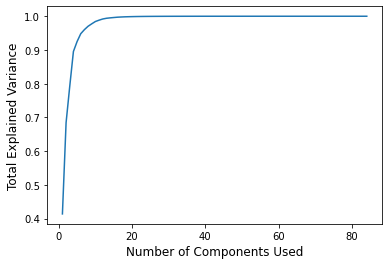

In [95]:
# Plot total explained variance vs components  
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components Used', fontsize = 12)
plt.ylabel('Total Explained Variance', fontsize = 12);

In [96]:
# Instantiate PCA with 10 components.
pca = PCA(n_components=10, random_state = 42)

# Fit PCA to training data.
pca.fit(X_train)

# Instantiate linear regression model.
lm = LinearRegression()

# Transform Z_train and Z_test.
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

# Fit on Z_train.
lm.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(lm.score(Z_train, y_train), 4)}')
print(f'Testing Score: {round(lm.score(Z_test, y_test), 4)}')

Training Score: 0.217
Testing Score: 0.2253


In [97]:
# Make a PCA dataframe
columns = [f'PCA_{i+1}' for i in pd.DataFrame(Z_train).columns]
z_df = pd.DataFrame(data = Z_train, columns=columns)
z_df['totalyearlycompensation'] = y_train.values
z_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,totalyearlycompensation
0,-3.105743,2.224353,3.285452,-0.188676,0.853648,-1.308950,0.123434,0.434787,-0.377777,0.137452,157.0
1,19.539881,9.368726,-1.823386,8.660281,-0.083732,-1.061375,2.524673,-1.568594,-1.166737,-0.934895,375.0
2,3.862899,-0.727082,2.236844,-4.292389,0.525401,-1.218147,0.116466,0.197144,-0.700266,-0.142411,420.0
3,-3.987893,1.857034,1.305351,2.674274,0.428540,-1.537201,-0.025872,0.489423,0.217605,0.038813,200.0
4,0.122565,-5.802120,-1.596331,0.217893,0.683566,0.724147,-0.069739,-0.422330,0.135873,0.445888,300.0


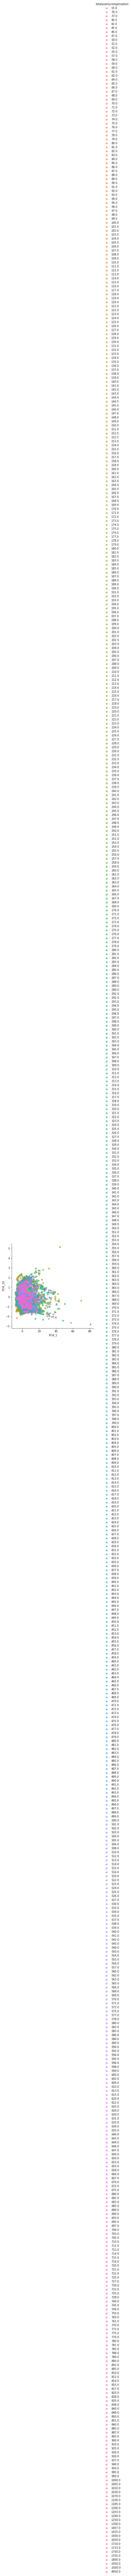

In [98]:
# Visualize PCA_1 vs. PCA_10
sns.lmplot(
    x="PCA_1",
    y="PCA_10",
    data=z_df, 
    fit_reg=False, 
    hue='totalyearlycompensation', # color by cluster
    legend=True,   
    scatter_kws={"s": 30} # specify the point size
);

In [99]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [100]:
# Loading dataset
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,year,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,2018,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,2018,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,2018,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [101]:
# convert year and month from integer to string
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                24496 non-null  object 
 1   company                  24496 non-null  object 
 2   level                    24496 non-null  object 
 3   title                    24496 non-null  object 
 4   totalyearlycompensation  24496 non-null  float64
 5   location                 24496 non-null  object 
 6   yearsofexperience        24496 non-null  float64
 7   yearsatcompany           24496 non-null  float64
 8   tag                      24496 non-null  object 
 9   year                     24496 non-null  object 
 10  month                    24496 non-null  object 
 11  year_month               24496 non-null  object 
 12  timestamp_3mos           24496 non-null  object 
 13  year_month_3mos          24496 non-null  object 
 14  state_short           

In [114]:
features = ['yearsofexperience', 'yearsatcompany','inflation_rate', 'inflation_rate_3mos', 'employment_rate',
       'employment_rate_3mos']
X = df[features]
y = df['totalyearlycompensation']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:

ct = ColumnTransformer([
    ('sc', StandardScaler(), make_column_selector(dtype_include=np.number)),
    #('ohe', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    #('ohe', OneHotEncoder(handle_unknown='ignore'), ['company','title','year','month','state']),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), [0,1,6])
    ])

X_train_ct = ct.fit_transform(X)
X_test_ct = ct.transform(X)




ValueError: all features must be in [0, 5] or [-6, 0]

In [110]:
X.isnull().sum()

company                 0
title                   0
yearsofexperience       0
state_short             0
yearsatcompany          0
inflation_rate          0
inflation_rate_3mos     0
employment_rate         0
employment_rate_3mos    0
dtype: int64

In [113]:
X.dtypes

company                  object
title                    object
yearsofexperience       float64
state_short              object
yearsatcompany          float64
inflation_rate          float64
inflation_rate_3mos     float64
employment_rate         float64
employment_rate_3mos    float64
dtype: object

In [111]:
# To show off the strength of PCA, we're going to make many, many more features.
pf = PolynomialFeatures(degree = 3)

# Fit and transform our X data using Polynomial Features.
X_new = pf.fit_transform(X)

# How many features do we have now?
print(X_new.shape)

# How many features did we start out with?
print(X.shape)

ValueError: could not convert string to float: 'Yahoo'

In [105]:
# Train/test split our data.
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42)

ValueError: Found input variables with inconsistent numbers of samples: [19596, 24496]

In [ ]:
# Instantiate and fit a linear regression model.
lm = LinearRegression()

lm.fit(X_train_ct, y_train)

# Score on training set. (We'll use R^2 for the score today.)

print(f"Train Score: {round(lm.score(X_train_ct, y_train), 4)}.")
# Score on testing set.
print(f"Test Score: {round(lm.score(X_test_ct, y_test), 4)}.")